In [1]:
from ipp_toolkit.predictors.masked_image_predictor import (
    EnsembledMaskedLabeledImagePredictor,
)
from ipp_toolkit.planners.masked_planner import RandomMaskedPlanner
from ipp_toolkit.data.domain_data import ALL_DOMAIN_MODELS
from ipp_toolkit.visualization.visualization import visualize_prediction
from sklearn.neural_network import MLPClassifier, MLPRegressor
import matplotlib.pyplot as plt


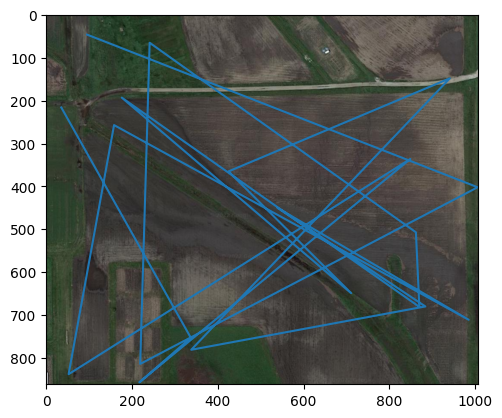

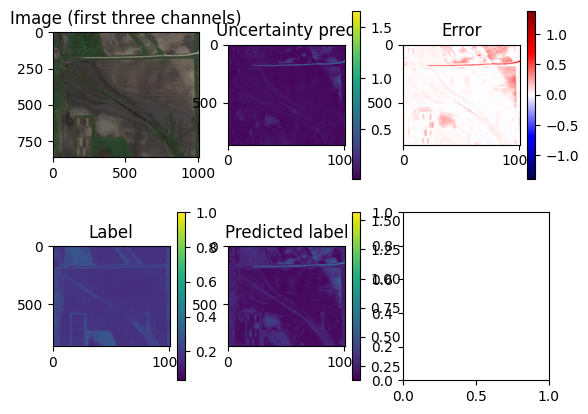

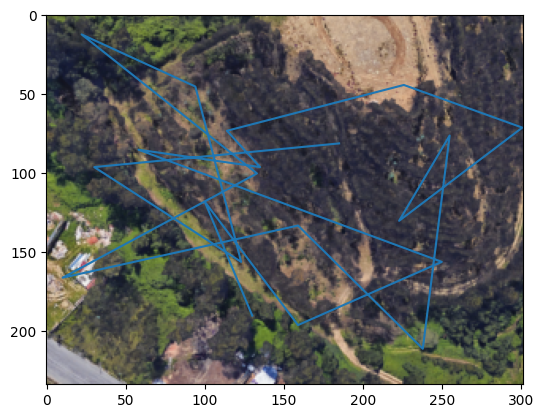

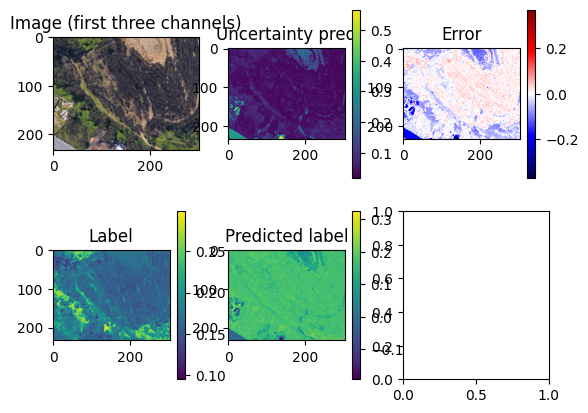

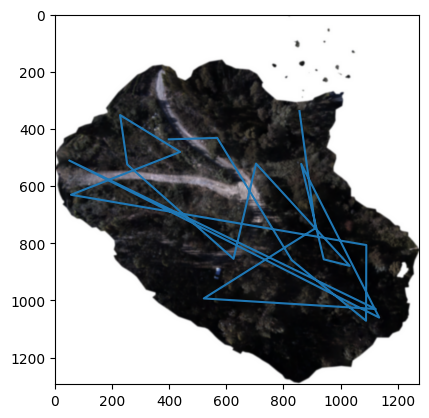

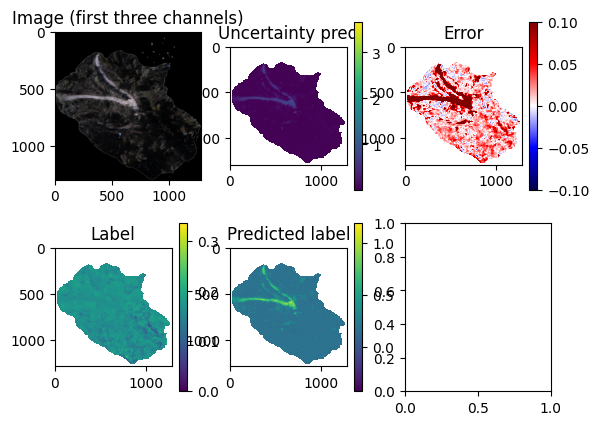

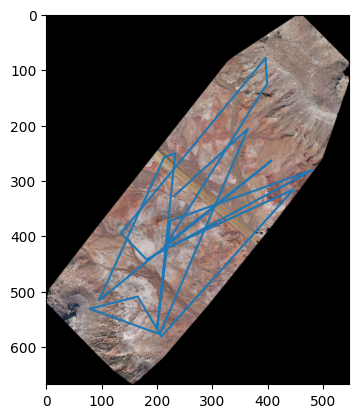

/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

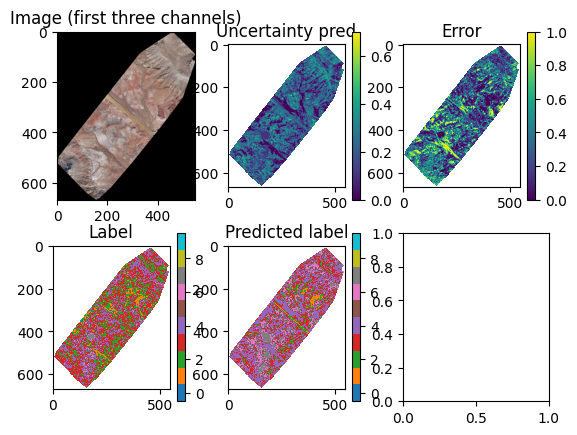

Using downloaded and verified file: /home/frc-ag-1/dev/research/informative-path-planning-toolkit/ipp_toolkit/../data/torchgeo/naip/m_3807511_ne_18_060_20181104.tif
Using downloaded and verified file: /home/frc-ag-1/dev/research/informative-path-planning-toolkit/ipp_toolkit/../data/torchgeo/naip/m_3807511_se_18_060_20181104.tif
Using downloaded and verified file: /home/frc-ag-1/dev/research/informative-path-planning-toolkit/ipp_toolkit/../data/torchgeo/naip/m_3807512_nw_18_060_20180815.tif
Using downloaded and verified file: /home/frc-ag-1/dev/research/informative-path-planning-toolkit/ipp_toolkit/../data/torchgeo/naip/m_3807512_sw_18_060_20180815.tif


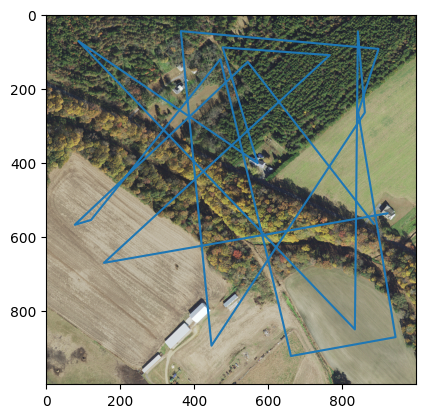

/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

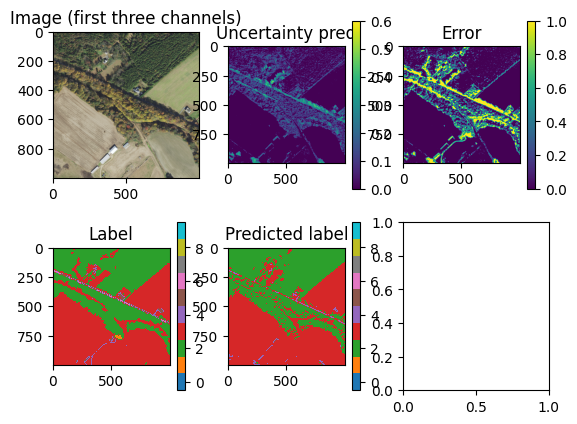

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


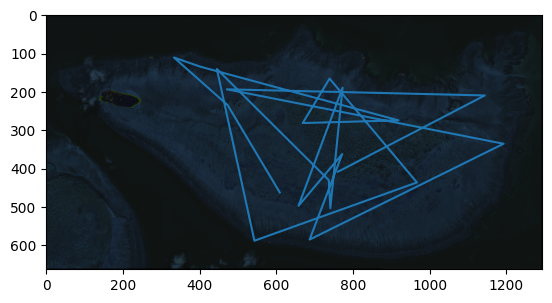

/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/frc-ag-1/anaconda3/envs/IPP-toolkit/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

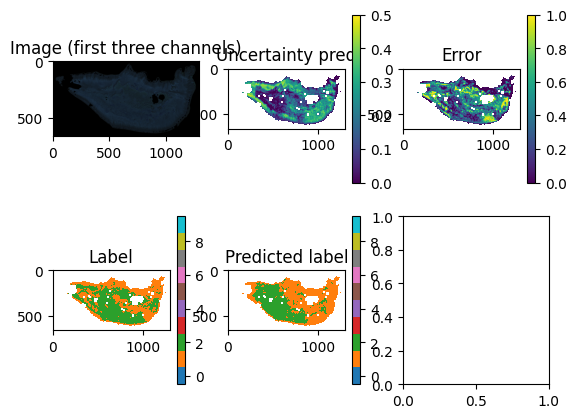

In [2]:
for name, domain_model in ALL_DOMAIN_MODELS.items():
    data = domain_model()
    model = MLPClassifier() if data.is_classification_dataset() else MLPRegressor()
    planner = RandomMaskedPlanner(data)
    predictor = EnsembledMaskedLabeledImagePredictor(
        data, prediction_model=model, n_ensemble_models=10, classification_task=data.is_classification_dataset()
    )

    plan = planner.plan(20, vis=True)
    values = data.sample_batch(plan)
    predictor.update_model(plan, values)

    prediction = predictor.predict_values_and_uncertainty()

    visualize_prediction(data, prediction, predictor)